In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)  

2.6.0


In [ ]:
mmist = tf.keras.datasets.mnist 

(train_images, train_labels), (test_images, test_labels) = mmist.load_data()


class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
train_images.shape

len(train_labels)

train_labels


test_images.shape

len(test_labels)

10000

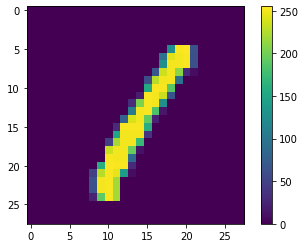

In [ ]:
plt.figure() 
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0  

test_images = test_images / 255.0

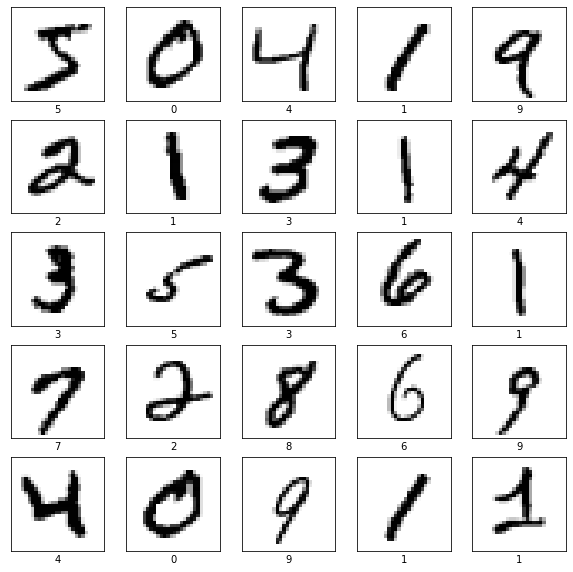

In [ ]:
plt.figure(figsize=(10,10))       
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([                                                       
tf.keras.layers.experimental.preprocessing.Rescaling(1, input_shape=(28, 28, 1)),
tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
]) 

In [ ]:
model.compile(optimizer='adam',                                                    
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.1144 - accuracy: 0.9649
Epoch 2/10
1875/1875 [==============================] - 112s 59ms/step - loss: 0.0398 - accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 5/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 6/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0115 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0082 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0071 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] 

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) 
 
print('\nTest result:', test_acc) 

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from PIL import Image
from numpy import asarray
im = Image.open('/content/drive/MyDrive/NS/0.png')
data = asarray(im)
img = data/255.0

# Новый раздел

In [ ]:
img = (np.expand_dims(img,0))

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(img)

In [ ]:
print(predictions)

[[0.341746   0.04175916 0.04987107 0.09479851 0.02236312 0.0860704
  0.19202924 0.0186105  0.08652227 0.0662297 ]]


In [ ]:
np.argmax(predictions)

0